In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [3]:
def polynomial_func(X) :
    y = 1+2*X[:,0]+3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n',X)
y = polynomial_func(X)
print('삼차 단항식 결정값:\n',y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 단항식 결정값:
 [  5 125]


In [5]:
from sklearn.linear_model import LinearRegression
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X) : 
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:, 1] **3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(X) :
    return np.cos(1.5*np.pi *X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.rand(n_samples) * 0.1


 Degree 1 회귀 계수는 [-1.52] 입니다.
Degree 1 MSE는 0.3855980524675215입니다.


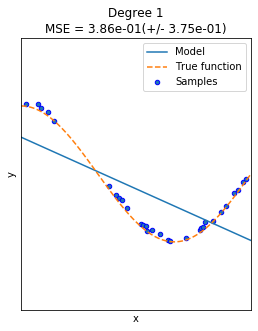


 Degree 4 회귀 계수는 [  1.74 -22.98  31.58 -11.24] 입니다.
Degree 4 MSE는 0.005719308263122045입니다.


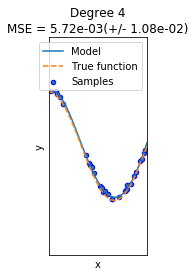


 Degree 15 회귀 계수는 [ 1.20140000e+02 -3.59872000e+03  5.21446800e+04 -4.14476860e+05
  1.80868799e+06 -3.37992441e+06 -6.02684726e+06  5.58440800e+07
 -1.69827424e+08  3.08630277e+08 -3.68966916e+08  2.93847846e+08
 -1.50696588e+08  4.51477248e+07 -6.01510532e+06] 입니다.
Degree 15 MSE는 42905665.41783635입니다.


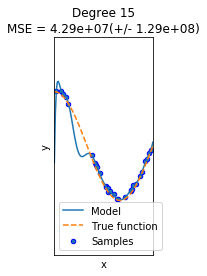

In [12]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)) :
    ax = plt.subplot(1, len(degrees), i+1)    
    plt.setp(ax , xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\n Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1}입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor = 'b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
    plt.show()